<h1>India Energy Transition Options</h1>
<div>Helper workbook for the publication entry for <a href="https://www.theconversation.com" target="_blank">The Conversation</a>, based on a project by <a href="http://www.csaladen.es" target="_blank" >Dénes Csala</a> of <a href="http://www.lancs.ac.uk" target="_blank" >Lancaster University</a> and <a href="http://www.ssgouridis.org" target="_blank" >Sgouris Sgouridis</a> of <a  href="http://www.masdar.ac.ae" target="_blank">Masdar Institute of Science and Technology</a>. This is the skimmed down version of the `calculator` workbooks we used for the  and <a href="http://set.csaladen.es" target="_blank" >SET</a> and <a href="http://netset.csaladen.es" target="_blank" >NETSET</a> projects.</div> 
<h2><br>Data processing notebook</h2>

This workbook will guide you through the mining, processing, formatting and saving the data for the visualization.

<p>This is document has been created using  <a target="_blank" href="http://ipython.org/">IPython Notebook</a> in the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution and it can be edited and run in <i>active</i> mode by clicking download in top right corner of this page. The code is partitioned into sections, called <i>cells</i>. When you are using this workbook in <i>active</i> mode, double-click on a cell to edit it and then run using <code>Ctrl + Enter</code>. Hitting <code>Shift + Enter</code> runs the code and steps into the next cell, while <code>Alt + Enter</code> runs the code and adds a new, empty cell. If you are running this notebook on a presonal computer, you will need a machine with at least <i>1GB</i> of memory (<i>2GB</i> recommended) and a processor of <i>1GHz</i>.
<h2>Data</h2>
<p>The major data sources for this work are the <a href="http://www.eia.gov/beta/international/data/browser/#?ord=SA&cy=2012&v=H&vo=0&so=0&io=0&start=1980&end=2012&vs=INTL.44-1-AFRC-QBTU.A~INTL.44-1-ASOC-QBTU.A~INTL.44-1-CSAM-QBTU.A~INTL.44-1-EURA-QBTU.A~INTL.44-1-EURO-QBTU.A~INTL.44-1-MIDE-QBTU.A~INTL.44-1-NOAM-QBTU.A" target="_blank">EIA</a>, <a href="http://www.bp.com/en/global/corporate/about-bp/energy-economics/energy-outlook.html" target="_blank">BP</a> and the UNSD population forecast open databases. Other minor data sources will be referenced further in the document, where relevant. Energy outlooks of the IEA, EIA were complied into a helper Excel file from visual information released by the agencies.
</p>
<h2>Processing</h2>
<p>The data processing has been done using the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution of <a target="_blank" href="https://www.python.org/">Python 2.7</a> using the <i>IPython Notebook</i> editor. The <i>EIA</i> database is accessed using the open-scource <a target="_blank" href="https://github.com/kennethreitz/requests">requests</a> <i>Python</i> library and the data is loaded into a <a target="_blank" href="http://pandas.pydata.org/">pandas</a> dataframe, which represents the backbone of the data analysis. The <i>BP</i> data comes as an aggregated <i>Excel .xls</i> file, therefore it can be directly loaded into <i>pandas</i>. The World Bank data comes in the form of <i>zipped csv</i> files and the are unzipped using the <i>requests</i> and <a target="_blank" href="https://docs.python.org/2/library/zipfile.html">zipfile</a> libraries. Numerical processing is done with <a target="_blank" href="http://www.numpy.org/">NumPy</a>. Please make sure you have all of these compoents set up in your <i>Python</i> installation.
</p>

<h1>Code</h1>

Import dependencies.

In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
%matplotlib inline

Set up save path on your local computer.

In [2]:
savepath=""

In [3]:
def cnc(country):
    return country

# Population

Consult the notebook entitled <i>pop.ipynb</i> for the details of mining the data from the UN statistics division online database.  
Due to being the reference database for country names cell, the cell below needs to be run first, before any other databases.

 <a href="http://nbviewer.ipython.org/url/set.csaladen.es/pop.ipynb" target="_blank">Population processing notebook</a> | output: <a target="_blank" href="https://dl.dropboxusercontent.com/u/333992592/Set/db/pop.csv">pop.csv</a>

In [4]:
#population data
pop=pd.read_csv('pop.csv').set_index(['Country','Year']).unstack(level=1)
pop.head(3)

Value                                                    \
Year           1950.0    1951.0    1952.0    1953.0    1954.0    1955.0   
Country                                                                   
Afghanistan    7451.0    7547.0    7651.0    7763.0    7882.0    8010.0   
Africa       228827.0  233364.0  238148.0  243180.0  248460.0  253988.0   
Albania        1214.0    1243.0    1276.0    1311.0    1350.0    1390.0   

                                                       ...                 \
Year           1956.0    1957.0    1958.0    1959.0    ...         2091.0   
Country                                                ...                  
Afghanistan    8146.0    8290.0    8443.0    8604.0    ...        61322.0   
Africa       259762.0  265780.0  272039.0  278537.0    ...      3933881.0   
Albania        1433.0    1477.0    1523.0    1570.0    ...         2329.0   

                                                                               \
Year            2092.0     2093.0     2094.0     2095.0     2096.0     2097.0   
Country                                                                         
Afghanistan    61112.0    60897.0    60676.0    60449.0    60218.0    59982.0   
Africa       3963991.0  3993557.0  4022570.0  4051019.0  4078898.0  4106198.0   
Albania         2314.0     2299.0     2285.0     2272.0     2260.0     2248.0   

                                              
Year            2098.0     2099.0     2100.0  
Country                                       
Afghanistan    59741.0    59497.0    59249.0  
Africa       4132914.0  4159041.0  4184577.0  
Albania         2237.0     2226.0     2217.0  

[3 rows x 151 columns]

# Define database parsers and units

Carefully set database path variable at the bottom of this cell:
-  0: direct online database access - the database API might havechanged over time so it might not work
-  1: working mirror on Dropbox of database files <a target="_blank" href="https://dl.dropboxusercontent.com/u/333992592/Set/db/index.html">here</a> (for SET project).
-  2: local path, use this if you have downloaded all necessary files and are doing local testing

In [15]:
#initialize data and constants
data={}
countries={i for i in pop.index}
years={int(i[1]) for i in pop.columns}
dbs={'bp','eia'}
datatypes={'prod','cons','emi','res'}
allfuels=['oil','coal','gas','nuclear','biofuels','hydro','geo_other','solar','wind']
fossils=['oil','coal','gas']+['nrg','nrg_sum']
transp=1 #transparency
#colorlist=np.array([[166,86,40,transp*255],[153,153,153,transp*255],[152,78,163,transp*255],
#                    [228,26,28,transp*255],[247,129,191,transp*255],[55,126,184,transp*255],
#                    [82,56,65,transp*255],[255,255,51,transp*255],[77,175,74,transp*255]])/255.0
colorlist=np.array([[131,13,9,transp*255],[85,20,52,transp*255],[217,20,14,transp*255],
                    [213,9,98,transp*255],[64,185,85,transp*255],[202,200,46,transp*255],
                    [106,23,9,transp*255],[251,212,31,transp*255],[112,133,16,transp*255]])/255.0
gcolors={allfuels[i]:colorlist[i] for i in range(len(allfuels))}

def reset(what='all',datatype='all'):
    global data
    if what=='all':
        #reset all values of database
        fuels=allfuels+['nrg','nrg_sum']
        data={i:{int(k[1]):{'energy':{j:{k:{l:np.NaN for l in dbs} for k in datatypes}\
                              for j in fuels},'population':long(pop.loc[i][k])*1000,\
                                              'consumer_efficiency':0.5,\
                                              'cumulative_emissions':0}\
                              for k in pop.columns}\
                              #we use population as the default database for country names
                              for i in pop.index} 
    else:
        countries=data.keys()
        for i in countries:
            for j in years:
                if datatype=='all':
                    data[i][j]['energy'][what]={k:{l:np.NaN for l in dbs} for k in datatypes}
                else:
                    data[i][j]['energy'][what][datatype]={l:np.NaN for l in dbs}

reset()

kbpd_to_TWh=365.25*0.001628200 #unit conversion from thousand barrels of oil per day to TWh per year
Gboe_to_TWh=1628.2 #unit conversion from thousand million barrels of oil to TWh
EJ_to_TWh=277.77 #unit conversion from exa Joule to TWh
bcf_to_TWh=0.2931 #unit conversion from billion cubic feet of natural gas to TWh
tcf_to_TWh=bcf_to_TWh*1000.0 #unit conversion from trillion cubic feet of natural gas to TWh
qbtu_to_TWh=293.297222 #unit conversion from quadrillion British thermal units to TWh
mtoe_to_TWh=11.63 #unit conversion million metric tons of oil equivalent to TWh
Mtoe_to_TWh=11.63 #unit conversion million metric tons of oil equivalent to TWh
Gtoe_to_TWh=11.63*1000 #unit conversion million metric tons of oil equivalent to TWh
kgge_to_gm3=1.49 #unit conversion from kilogram of natural gas to cubic meter, based on CH4
mtlnge_to_TWh=14.45 #unit conversion million metric tons of gas (LNG) equivalent to TWh
cm_to_cf=35.3 #unit conversion from million cubic meters to million cubic feet
tcm_to_TWh=tcf_to_TWh*cm_to_cf #unit conversion from trillion cubic meters of natural gas to TWh
kgge_to_TWh=kgge_to_gm3*tcf_to_TWh*cm_to_cf*1e-18 #unit conversion from kilogram of natural gas to TWh
#mtge_to_TWh=kgge_to_gm3*tcf_to_TWh*cm_to_cf*1e-9 #unit conversion from kilogram of natural gas to TWh
mtge_to_GJ=53.6
mtge_to_TWh=mtge_to_GJ*1e-9*EJ_to_TWh
t_to_st=1.10231 #unit conversion from metric ton to short ton
tcoe_to_toe=0.7 #unit conversion from metric tons of coal equivalent to metric tons of oil equivalent
mtcoe_to_TWh=tcoe_to_toe*mtoe_to_TWh #unit conversion million metric tons of coal equivalent to TWh
#mtcoe_to_TWh=8.141
mstcoe_to_TWh=mtcoe_to_TWh*t_to_st #unit conversion million metric short tons of coal equivalent to TWh
c_to_co2=44.0/12 #unit conversion from C to CO2 mass

carbon_budget=840*c_to_co2 #840 GtC as per http://www.ipcc.ch/report/ar5/wg1/

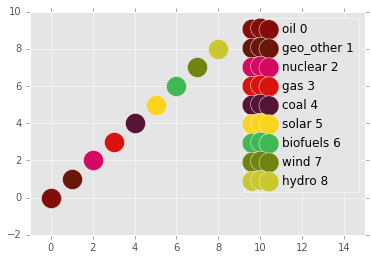

In [16]:
#colortester
plt.style.use('ggplot')
for i,d in enumerate(gcolors):
    plt.scatter(i,i,400,c=gcolors[d],label=d+' '+str(i))
    #print np.array(gcolors[d])*255,d
plt.xlim(-1,15)
plt.legend()

## EIA

Due to being the reference database for country names cell, the cell below needs to be run first, before any other energy databases.

In [17]:
#EIA
def eia_parse(url,fuel,datatype,unitconverter,end,additive=False):
    eia=pd.read_excel(url)
    eia=eia.drop(eia.index[:1]).T.set_index([1]).T
    eia.columns=['Country','Drop']+range(end+1-len(eia.columns)+2,end+1)
    eia=eia.drop('Drop',axis=1).drop(eia.index[:1]).set_index('Country')
    
    #save data
    global data
    for country in eia.index:
        if cnc(country) in data:
            for year in set(eia.columns):
                if eia.loc[country][year]=='--': number = np.NaN
                else: number=eia.loc[country][year]
                try: 
                    if additive: data[cnc(country)][year]['energy'][fuel][datatype]['eia']+=number*unitconverter
                    else: data[cnc(country)][year]['energy'][fuel][datatype]['eia']=number*unitconverter
                except: pass
            if country+' (Offshore)' in eia.index:
                for year in set(eia.columns):
                    if eia.loc[country+' (Offshore)'][year]=='--': number = np.NaN
                    else: number=eia.loc[country+' (Offshore)'][year]
                    try: data[cnc(country)][year]['energy'][fuel][datatype]['eia']+=number*unitconverter
                    except: pass

## BP

Make sure you set the local path correctly, if you have set the variable <i>path</i> equal to 2.

In [18]:
#BP
def bp_parse(sheet,fuel,datatype,unitconverter,end,additive=False):
    if path==0: url='http://www.bp.com/content/dam/bp/excel/energy-economics/statistical-review-2015/bp-statistical-review-of-world-energy-2015-workbook.xlsx'
    elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/bp-statistical-review-of-world-energy-2015-workbook.xlsx'
    else: url='E:/Dropbox/Public/datarepo/netset/db/bp-statistical-review-of-world-energy-2015-workbook.xlsx'
    bp=pd.read_excel(url,sheetname=sheet)
    bp=bp.drop(bp.index[:1]).T.set_index([1]).T
    bp.columns=['Country']+range(end+1-len(bp.columns)+3,end+1)+['Drop1','Drop2']
    bp=bp.drop('Drop1',axis=1).drop('Drop2',axis=1).drop(bp.index[:1]).set_index('Country').dropna(axis=0, how='all')
    
    #save data
    global data
    for country in bp.index:
        if cnc(country) in data:
            for year in set(bp.columns):
                if bp.loc[country][year]==u'n/a': number = np.NaN
                else: number=bp.loc[country][year]
                try: 
                    if additive: data[cnc(country)][year]['energy'][fuel][datatype]['bp']+=number*unitconverter
                    else: data[cnc(country)][year]['energy'][fuel][datatype]['bp']=number*unitconverter
                except: pass

## AVG (Average)

Artificial variable to create average of two databases, treated from this point forward as a database of its own. There are two flavors of it, <i>AVG</i> and <i>NAVG</i>. The former only includes years where both databases have entries while the latter takes as valid also the years where only one database features a value.

In [19]:
#AVG
def avg_parse(fuel,datatype):
    for country in data:
        for year in data[country]:
            if not np.isnan(data[country][year]['energy'][fuel][datatype].values()).any():
                data[country][year]['energy'][fuel][datatype]['avg']=np.mean(data[country][year]['energy'][fuel][datatype].values())
            else: data[country][year]['energy'][fuel][datatype]['avg']=np.NaN

#NAVG - average ignoring nans - just take the average of whatever data is available
def navg_parse(fuel,datatype):
    for country in data:
        for year in data[country]:
            if not np.isnan(data[country][year]['energy'][fuel][datatype].values()).all():
                data[country][year]['energy'][fuel][datatype]['navg']=np.nanmean(data[country][year]['energy'][fuel][datatype].values())
            else: data[country][year]['energy'][fuel][datatype]['navg']=np.NaN

## Global

Define main data parser function.

In [20]:
def parse(url,sheet,fuel,datatype,units,end,additive=False,onlyaverage=0): #onlyaverage 0=all, 1=only data, 2=only average
    if not additive: 
        if onlyaverage!=2:
            reset(fuel,datatype)
    if onlyaverage!=2:
        if url!='none':
            eia_parse(url,fuel,datatype,units['eia'],end['eia'],additive)
        if sheet!='none':
            bp_parse(sheet,fuel,datatype,units['bp'],end['bp'],additive)
    if onlyaverage!=1:
        avg_parse(fuel,datatype)
        navg_parse(fuel,datatype)

# Define plotters and getters

Define shortcut function for quick plotting and getting database data streams.

In [21]:
def subplotter(country,fuel,db,datatype,ax):
    try:
        ax.plot(subgetter(country,fuel,db,datatype)['x'],subgetter(country,fuel,db,datatype)['y'],label=db+' '+datatype,linewidth=2)
    except: print 'ERROR plotting', country, fuel, db, datatype

def fracplotter(country,fuel,db,top,down,ax):
    try:
        ax.plot(fracgetter(country,fuel,db,top,down)['x'],\
            fracgetter(country,fuel,db,top,down)['y'],label=db+' '+top+'/'+down,linewidth=2,linestyle='--')
    except: print 'ERROR plotting', country, fuel, db, top+'/'+down
        
def plotter(country,fuel,db='avg',limits=[1965,2015]):
    fig, ax = plt.subplots(1,3,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(17,4))
    for i in range(3): ax[i].grid(color='white', linestyle='solid')
    
    if fuel=='population': 
        subplotter(country,fuel,'un','population',ax[0])
        ax[0].set_ylabel('million',labelpad=14)
        ax[0].set_xlim(limits)
    elif fuel=='cumulative_emissions': 
        subplotter(country,fuel,'cumulative','emissions',ax[0])
        ax[0].plot(limits,np.ones(len(limits))*carbon_budget,'r--',label='carbon budget')
        ax[0].set_ylabel('GtCO2',labelpad=14)
        ax[0].set_xlim(limits)
    else: 
        ax[0].set_ylabel('TWh',labelpad=-60)
        if fuel in fossils:
            ax[1].set_ylabel('TWh',labelpad=-70)
            ax[2].set_ylabel('MtCO2',labelpad=-60)
            ax1=ax[1].twinx()
            ax2=ax[2].twinx()
        for i in range(3): ax[i].set_xlim(limits)
        if db=='all': db=dbs | {'avg'}
        if type(db)==str: db={db}
        for i in db:
            subplotter(country,fuel,i,'cons',ax[0])
            subplotter(country,fuel,i,'prod',ax[0])
            if fuel in fossils:
                subplotter(country,fuel,i,'res',ax[1])
                subplotter(country,fuel,i,'emi',ax[2])
                #plot extraction ratio
                fracplotter(country,fuel,i,'prod','res',ax1)
                #plot carbon intensity
                fracplotter(country,fuel,i,'emi','cons',ax2)
                
    for i in range(3): ax[i].legend(loc=2,framealpha=0.8)
    ax[0].set_title(fuel)
    if fuel in fossils:
        ax1.legend(loc=4,framealpha=0.8)
        ax2.legend(loc=4,framealpha=0.8)
        ax1.set_ylabel('fraction',labelpad=-50)
        ax2.set_ylabel('kgCO2/kWh primary',labelpad=-45)
    plt.suptitle(country,fontsize=14,color='green')
    plt.show()
    
def subgetter(country,fuel,db,datatype):
    try:
        if fuel=='population':
            x=np.sort(list(years))
            y=[data[country][i]['population']/1000000.0 for i in x]
        elif fuel=='cumulative_emissions':
            x=np.sort(list(years))
            y=[data[country][i]['cumulative_emissions']/1000.0 for i in x]
        else:
            x=[i for i in np.sort(list(years)) if not np.isnan(data[country][i]['energy'][fuel][datatype][db])]
            y=[data[country][i]['energy'][fuel][datatype][db] for i in x]
        return {'x':x,'y':y}
    except: print 'ERROR getting', country, fuel, db, datatype

def fracgetter(country,fuel,db,top,down):
    try:
        a=subgetter(country,fuel,db,top)['x']
        b=subgetter(country,fuel,db,down)['x']
        c=np.intersect1d(a,b)
        d=np.searchsorted(a,c)
        e=np.searchsorted(b,c)
        x=a[d[0]:d[::-1][0]+1]
        y=np.array(subgetter(country,fuel,db,top)['y'][d[0]:d[::-1][0]+1])/\
          np.array(subgetter(country,fuel,db,down)['y'][e[0]:e[::-1][0]+1])
        return {'x':x,'y':y}
    except: print 'ERROR getting', country, fuel, db, top+'/'+down
        
def getter(country,fuel,db='avg'):
    if fuel=='population': 
        return subgetter(country,fuel,'un','population')
    elif fuel=='cumulative_emissions': 
        return subgetter(country,fuel,'cumulative','emissions')
    else: 
        if db=='all': db=dbs | {'avg'}
        if type(db)==str: db={db}
        aux={}
        for i in db:
            aux[i]={}
            for datatype in {'cons','prod','emi','res'}:
                aux[i][datatype]=subgetter(country,fuel,i,datatype)
        return aux

Test plotter on population data.

C:\Anaconda\envs\py27\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


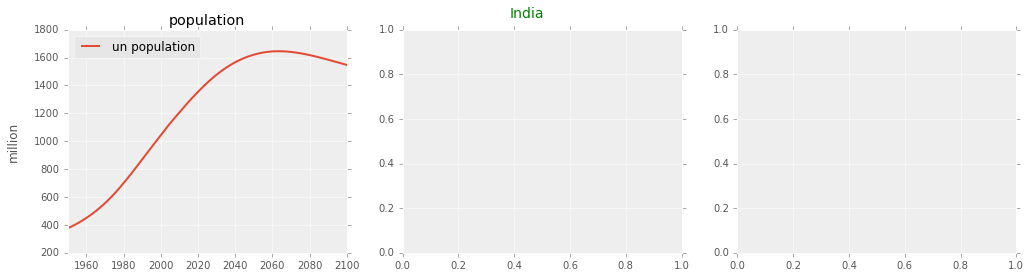

In [22]:
plotter('India','population',limits=[1950,2100])

# Parse primary energy production and consumption data

Primary energy is energy extracted from the primary source. That could be the amount of energy of oil extracted from the ground or the amount of potential energy of the water. Combustible energy sources (fossils+biofuels) are all primary energy sources, as well as renewables and nuclear electricity.

The typical energy stages that we consider here are:

| Primary  | Secondary  | Tertiary  | Quaternary  |
|---|---|---|---|
| Energy from primary (direct) sources: Renewable & Nuclear, Fossil Fuels & Biofuels  | Electricity | Intermediate energy between two electricity stages: Storage and Power-to-liquid | Regenerated Electricity  |

It is assumed that energy can only stored in primary form (e.g. oil or water potential, etc.) or tertiary (batteries, compressed air (CAES), liquids). Therefore at the primary and tertiary energy stage, we will report both production and consumption data, but at other stages, we only report consumption values.

# Fossils

## Oil

Set up local paths again, if you need it.

In [23]:
#set path
path=2 #0 online direct 1 online backup 2 local

In [24]:
#parse data

fuel='oil'
units={'bp':kbpd_to_TWh,'eia':kbpd_to_TWh}
end={'bp':2014,'eia':2014}

#oil prod
if path==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=53&pdid=53,55,57,58,59,56,54,62,63,64,65,66,67,68&aid=1&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Oil_Supply_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Oil_Supply_(Thousand_Barrels_Per_Day).xls'
sheet=u'Oil Production – Barrels'
parse(url,sheet,fuel,'prod',units,end)

#oil cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=5&pdid=5,62,63,64,65,66,67,68&aid=2&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Petroleum_Consumption_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Petroleum_Consumption_(Thousand_Barrels_Per_Day).xls'
sheet=u'Oil Consumption – Barrels'
parse(url,sheet,fuel,'cons',units,end)

#oil res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=57&pdid=57&aid=6&cid=regions&syid=1980&eyid=2015&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BB&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Crude_Oil_Proved_Reserves_(Billion_Barrels).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Crude_Oil_Proved_Reserves_(Billion_Barrels).xls'
units={'bp':Gboe_to_TWh,'eia':Gboe_to_TWh} #redefine units
end={'bp':2014,'eia':2015}
sheet=u'Oil - Proved reserves history'
parse(url,sheet,fuel,'res',units,end)

#oil emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=5&pdid=5&aid=8&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/CO2_Emissions_from_the_Consumption_of_Petroleum_(Million_Metric_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/CO2_Emissions_from_the_Consumption_of_Petroleum_(Million_Metric_Tons).xls'
units={'bp':3.07*kbpd_to_TWh/mtoe_to_TWh,'eia':1} #redefine units
end={'bp':2014,'eia':2013}
sheet=u'Oil Consumption – Barrels'
parse(url,sheet,fuel,'emi',units,end)

The oil consumption and production, reserves and emissions are parsed for all countries for the available years (tyipically 1965 - 2013) and converted to the main energy units of the workboo, TWh. Here the <i>World</i> data is featured, but this can be called for all countries.

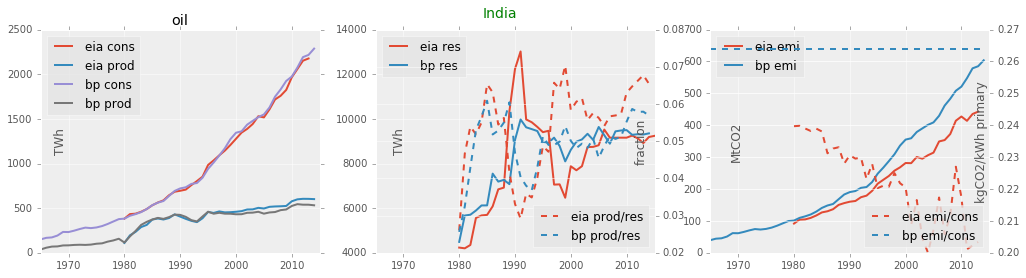

In [25]:
plotter('India',fuel,dbs) #change 'avg' to {'bp'}, 'eia', 'all' or any set such as {'bp','avg'}
#dbs={'bp','eia'}
#avg is average where only both eia and bp data is available, null otherwise
#navg is NaN-average which takes a value of only one dataset where only dataset is avialble, avg elsewhere

##Natural gas

In [26]:
fuel='gas'
units={'bp':bcf_to_TWh*365.25,'eia':bcf_to_TWh}
end={'bp':2014,'eia':2014}

#gas prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=26&pdid=3,43,48,24,26&aid=1&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Dry_Natural_Gas_Production_(Billion_Cubic_Feet).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Dry_Natural_Gas_Production_(Billion_Cubic_Feet).xls'
sheet=u'Gas Production – Bcf'
parse(url,sheet,fuel,'prod',units,end)

#gas cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=26&pdid=26&aid=2&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Dry_Natural_Gas_Consumption_(Billion_Cubic_Feet).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Dry_Natural_Gas_Consumption_(Billion_Cubic_Feet).xls'
sheet=u'Gas Consumption – Bcf'
parse(url,sheet,fuel,'cons',units,end)

#gas res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=3&pdid=3&aid=6&cid=regions&syid=1980&eyid=2015&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Proved_Reserves_of_Natural_Gas_(Trillion_Cubic_Feet).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Proved_Reserves_of_Natural_Gas_(Trillion_Cubic_Feet).xls'
units={'bp':tcm_to_TWh,'eia':tcf_to_TWh} #redefine units
end={'bp':2014,'eia':2015}
sheet=u'Gas - Proved reserves history '
parse(url,sheet,fuel,'res',units,end)

#gas emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=3&pdid=3,51,52&aid=8&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/C02_Emissions_from_the_Consumption_and_Flaring_of_Natural_Gas_(Million_Metric_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/C02_Emissions_from_the_Consumption_and_Flaring_of_Natural_Gas_(Million_Metric_Tons).xls'
units={'bp':2.35*bcf_to_TWh*365.25/mtoe_to_TWh,'eia':1} #redefine units
end={'bp':2014,'eia':2013}
sheet=u'Gas Consumption – Bcf'
parse(url,sheet,fuel,'emi',units,end)

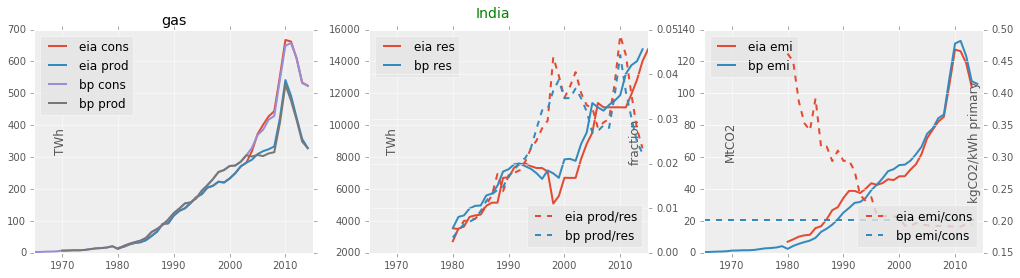

In [27]:
plotter('India','gas',dbs)

## Coal

In [28]:
fuel='coal'
units={'bp':mtoe_to_TWh,'eia':qbtu_to_TWh}
end={'bp':2014,'eia':2012}

#coal prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=7&pdid=7,9,11,12,14,17,18,21&aid=1&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Primary_Coal_Production_(Quadrillion_Btu).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Primary_Coal_Production_(Quadrillion_Btu).xls'
sheet=u' Coal Production - Mtoe'
parse(url,sheet,fuel,'prod',units,end)

#coal cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=1&pdid=1&aid=2&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Coal_Consumption_(Quadrillion_Btu).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Coal_Consumption_(Quadrillion_Btu).xls'
sheet=u'Coal Consumption -  Mtoe'
parse(url,sheet,fuel,'cons',units,end)

#coal res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=7&pdid=7,9,14&aid=6&cid=regions&syid=2011&eyid=2011&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MST&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Recoverable_Coal_(Million_Short_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Recoverable_Coal_(Million_Short_Tons).xls'
units={'bp':mtcoe_to_TWh,'eia':mstcoe_to_TWh} #redefine units
end={'bp':2014,'eia':2011}
sheet=u'Coal - Reserves'
parse(url,sheet,fuel,'res',units,end,False,1) #don't calculte averages yet, fix db first
#fill bp data for 2011-2013
for i in data.keys():
    for j in range(2011,2014):
        try:
            data[i][j]['energy'][fuel]['res']['bp']=np.NaN
        except: pass
parse(url,sheet,fuel,'res',units,end,False,2) #recalculate averages - last parameter is only average

#coal emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=1&pdid=1&aid=8&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/CO2_Emissions_from_the_Consumption_of_Coal_(Million_Metric_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/CO2_Emissions_from_the_Consumption_of_Coal_(Million_Metric_Tons).xls'
units={'bp':3.96*1,'eia':1} #redefine units
end={'bp':2014,'eia':2012}
sheet=u'Coal Consumption -  Mtoe'
#bp does not report direct emissions values, just consumption + carbon content
parse(url,sheet,fuel,'emi',units,end)

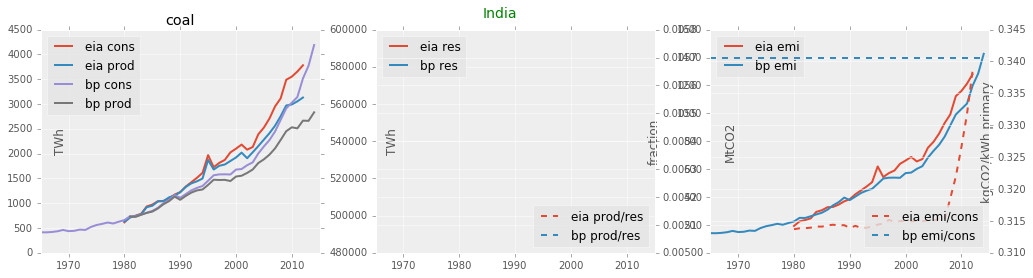

In [29]:
plotter('India','coal',dbs)

# Biofuels

BP only gives production values.

In [30]:
fuel='biofuels'
units={'bp':mtoe_to_TWh/1000,'eia':kbpd_to_TWh}
end={'bp':2018,'eia':2012}

#biofuels prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=79&pid=79&pdid=79,80,81&aid=1&cid=regions&syid=2000&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Biofuels_Production_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Biofuels_Production_(Thousand_Barrels_Per_Day).xls'
sheet=u'Biofuels Production - Ktoe'
parse(url,sheet,fuel,'prod',units,end)

#biofuels cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=79&pid=79&pdid=79,80,81&aid=2&cid=regions&syid=2000&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Biofuels_Consumption_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Biofuels_Consumption_(Thousand_Barrels_Per_Day).xls'
sheet='none'
parse(url,sheet,fuel,'cons',units,end)

#fill data after 2014
for i in data.keys():
    for j in range(2015,2019):
        try:
            data[i][j]['energy'][fuel]={k:{l:np.NaN for l in (dbs|{'avg','navg'})} for k in datatypes}
        except: pass

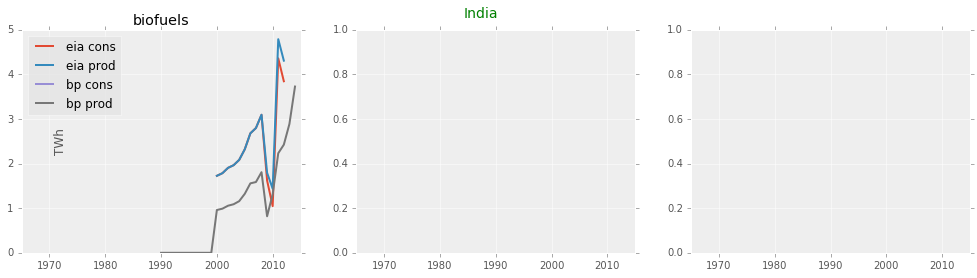

In [31]:
plotter('India','biofuels',dbs)

# Electricity

Currently electricity production = consumption + losses - imports + exports + (storage = 0)  
Since there is no substantial long-term storage and the losses are quasi-constant around 7%, one call to the database is enough.  
EIA only gives generation values, while BP only gives consumption values. Strangely, BP consumption values are higher than EIA generation values.

## Nuclear

In [32]:
fuel='nuclear'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2013}

#nuclear prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=2&pid=27&pdid=&aid=12&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Nuclear_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Nuclear_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#nuclear cons
url='none'
sheet=u'Nuclear Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

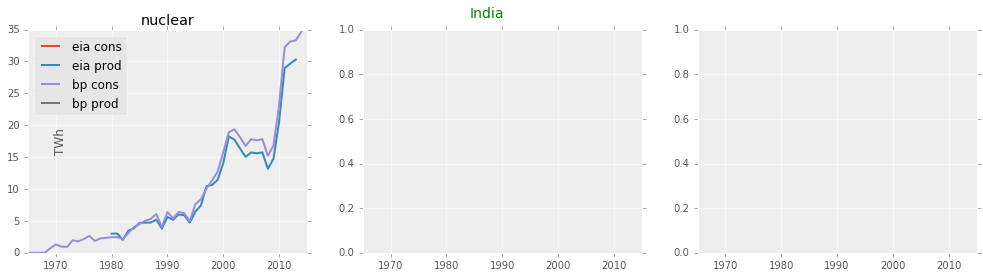

In [33]:
plotter('India','nuclear',dbs)

## Hydropower

In [34]:
fuel='hydro'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2013}

#hydro prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=2&pid=33&pdid=&aid=12&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Hydroelectricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Hydroelectricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#hydro cons
url='none'
sheet=u'Hydro Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

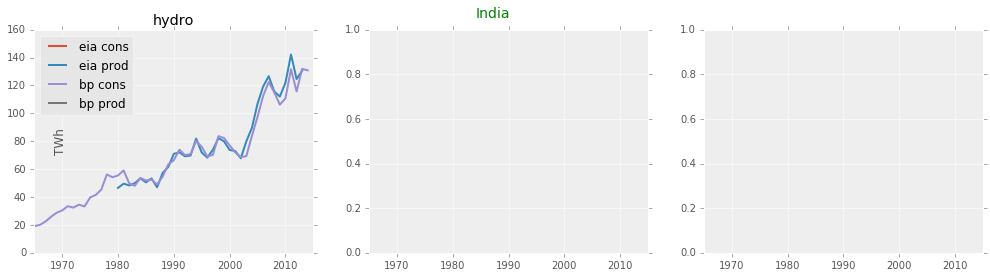

In [35]:
plotter('India','hydro',dbs)

## Solar

In [36]:
fuel='solar'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2012}

#solar prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=116&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Solar_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Solar_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#solar cons
url='none'
sheet=u'Solar Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

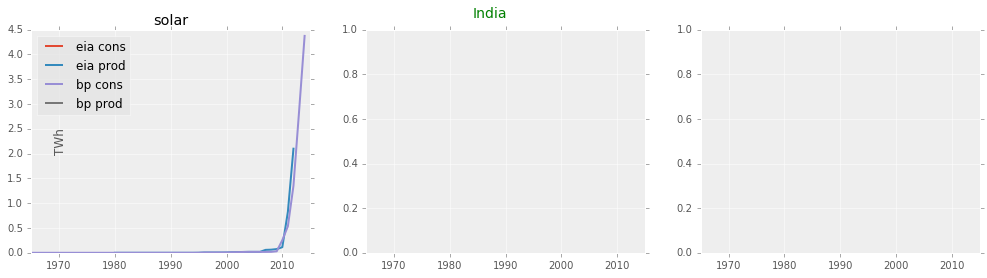

In [37]:
plotter('India','solar',dbs)

## Wind

In [38]:
fuel='wind'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2012}

#wind prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=37&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Wind_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Wind_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#wind cons
url='none'
sheet=u'Wind Consumption - TWh '
parse(url,sheet,fuel,'cons',units,end)

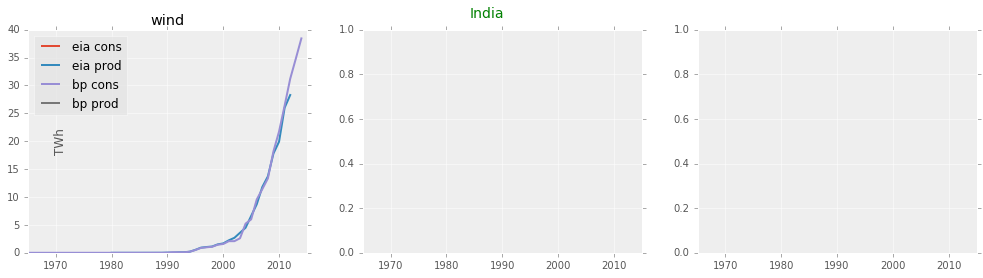

In [39]:
plotter('India','wind',dbs)

## Geothermal + Other

In [40]:
fuel='geo_other'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2012}

#geo+other prod
#geothermal
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=35&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Geothermal_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Geothermal_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'])
#biomass+waste
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=38&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Biomass_and_Waste_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Biomass_and_Waste_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'],True) #set last parameter to True to make operation additive
#tidal+wave
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=117&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Tide_and_Wave_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Tide_and_Wave_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'],True) #set last parameter to True to make operation additive

url='none'
sheet='none'
parse(url,sheet,fuel,'prod',units,end,True)

#geo+other cons
url='none'
sheet=u'Geo Biomass Other - TWh'
parse(url,sheet,fuel,'cons',units,end)

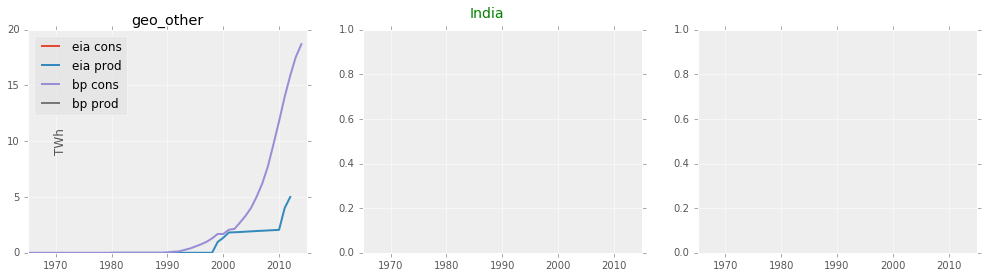

In [41]:
plotter('India','geo_other',dbs)

# Total primary energy

## Sum

Create summed energy category, for comparison.

In [42]:
reset('nrg_sum')
for country in data:
    for year in data[country]:
        for k in {'prod','cons','emi','res'}:
            for j in dbs:
                data[country][year]['energy']['nrg_sum'][k][j]=\
                np.nansum([data[country][year]['energy'][i][k][j] for i in data[country][year]['energy'].keys() if (i not in {'nrg','nrg_sum'})])
                if (data[country][year]['energy']['nrg_sum'][k][j]==0): data[country][year]['energy']['nrg_sum'][k][j]=np.NaN

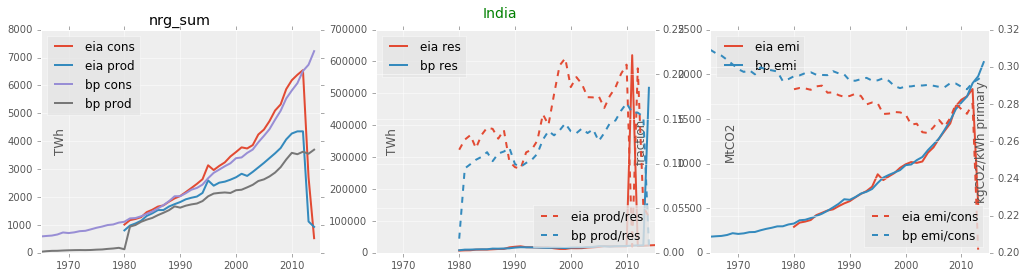

In [43]:
plotter('India','nrg_sum',dbs)

## Direct parse - including biomass

In [44]:
fuel='nrg'
units={'bp':mtoe_to_TWh,'eia':qbtu_to_TWh}
end={'bp':2014,'eia':2012}

#total prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=44&pid=44&pdid=44&aid=1&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Primary_Energy_Production_(Quadrillion_Btu).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Primary_Energy_Production_(Quadrillion_Btu).xls'
sheet=u'none'
parse(url,sheet,fuel,'prod',units,end)

#total cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=44&pid=44&pdid=44,45,46,47&aid=2&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/Total_Primary_Energy_Consumption_(Quadrillion_Btu).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/Total_Primary_Energy_Consumption_(Quadrillion_Btu).xls'
sheet=u'Primary Energy Consumption '
parse(url,sheet,fuel,'cons',units,end)

#total emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=90&pid=44&pdid=&aid=8&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/netset/db/_(Million_Metric_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/netset/db/_(Million_Metric_Tons).xls'
units={'bp':1,'eia':1} #redefine units
end={'bp':2014,'eia':2012}
sheet=u'Carbon Dioxide Emissions'
parse(url,sheet,fuel,'emi',units,end)

ERROR getting India nrg eia prod/res
ERROR plotting India nrg eia prod/res
ERROR getting India nrg bp prod/res
ERROR plotting India nrg bp prod/res


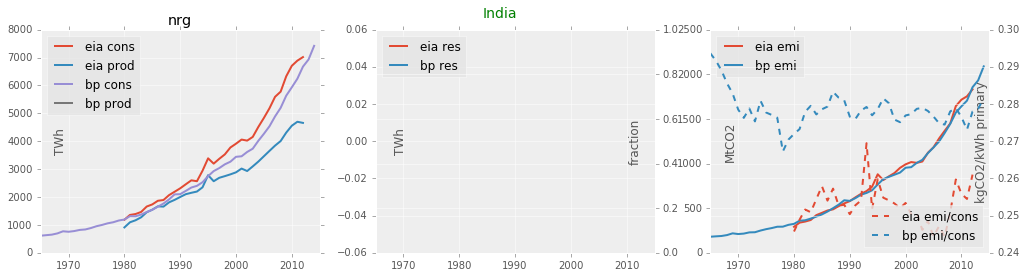

In [45]:
plotter('India','nrg',dbs)

Define composite plotter, <code>stackplotter</code> which plots all parsed energy values for a certian country from a certain database.

In [46]:
from matplotlib.patches import Rectangle
def stackplotter(country,db='navg',datatype='all',fuels='all',limits=[1965,2015]):
    x=np.sort(list(years))
    if datatype!='all':
        fig, ax = plt.subplots(1,1,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(10,6))
        ax.grid(color='white', linestyle='solid')

        if type(fuels)==str: 
            if fuels=='all':fuels=allfuels
            else: fuels=[fuels]
        ind=np.argsort([np.isnan(np.array([data[country][year]['energy'][fuel][datatype][db] for year in x]).T).sum() for fuel in fuels])
        fuels=np.array(fuels)[ind]
        colors=[gcolors[fuel] for fuel in fuels]
        y=np.array([[data[country][year]['energy'][i][datatype][db] for i in fuels] for year in x]).T

        stack_coll=ax.stackplot(x,y,colors=colors)
        proxy_rects = [Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in stack_coll][::-1]

        ax.legend(proxy_rects, fuels[::-1],loc=2,framealpha=0)
        if datatype=='emi': ax.set_ylabel('MtCO2',labelpad=10)
        else: ax.set_ylabel('TWh',labelpad=10)
        ax.set_title(db+' '+datatype)
        ax.set_xlim(limits)
    else:
        fig, ax = plt.subplots(1,2,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(17,5))
        datatype=['prod','cons']
        ymax=0
        for k in range(2): 
            ax[k].grid(color='white', linestyle='solid')
        
            if type(fuels)==str: 
                if fuels=='all':fuels=allfuels
                else: fuels=[fuels]
            ind=np.argsort([np.isnan(np.array([data[country][year]['energy'][fuel][datatype[k]][db] for year in x]).T).sum() for fuel in fuels])
            fuels=np.array(fuels)[ind]
            colors=[gcolors[fuel] for fuel in fuels]
            y=np.array([[data[country][year]['energy'][i][datatype[k]][db] for i in fuels] for year in x]).T
            
            stack_coll=ax[k].stackplot(x,y,colors=colors)
            proxy_rects = np.array([Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in stack_coll][::-1])

            ax[k].legend(proxy_rects, fuels[::-1],loc=2,framealpha=0.7)
            ax[k].set_ylabel('TWh',labelpad=10)
            ax[k].set_title(db+' '+datatype[k])
            ax[k].set_xlim(limits)
            ymax=max(ymax,ax[k].get_ylim()[1])
        for k in range(2): 
            ax[k].set_ylim([0,ymax])
    plt.suptitle(country,fontsize=14,color='green')
    plt.show()

Plot all parsed and available data as a stackplot.

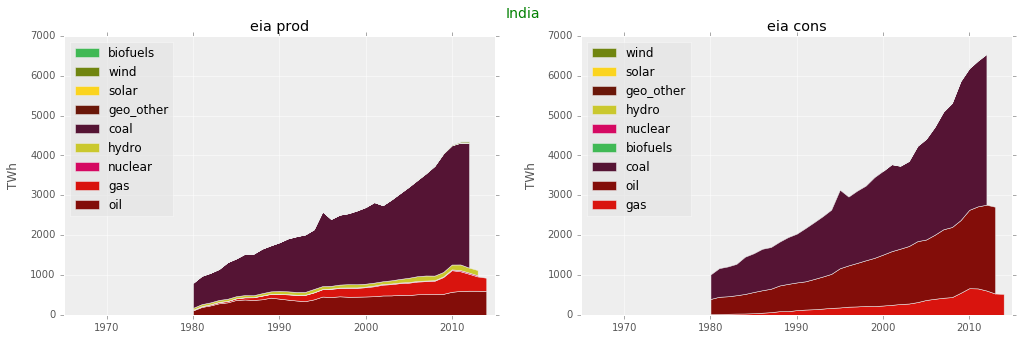

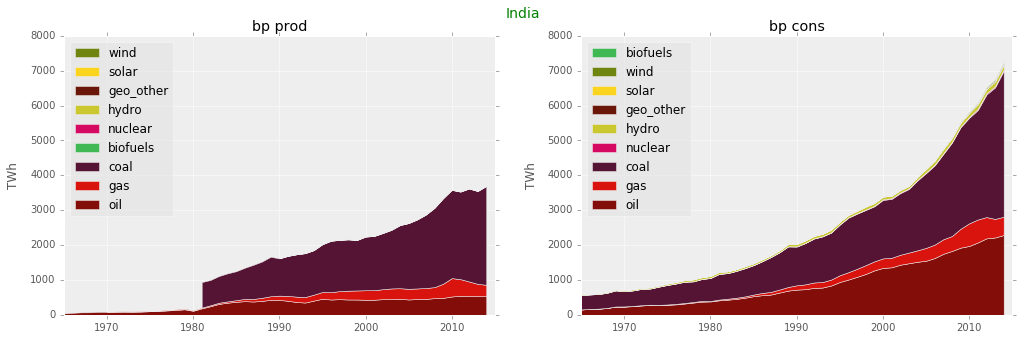

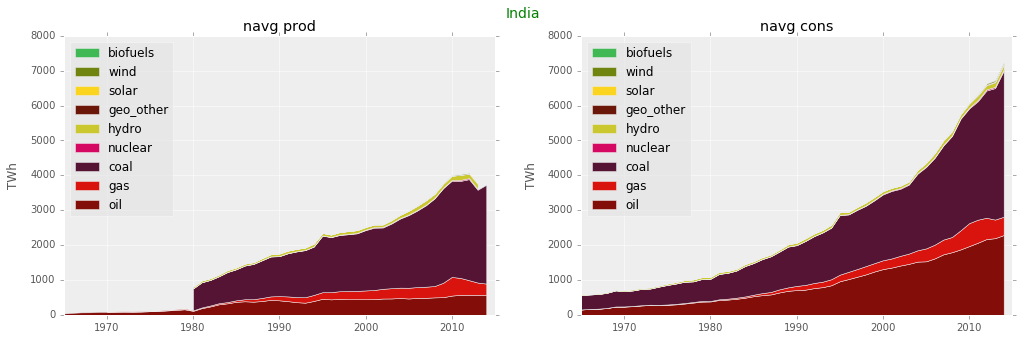

In [47]:
stackplotter('India','eia','all','all')
stackplotter('India','bp','all','all')
stackplotter('India','navg','all','all')

# Transform data

Add in data for 2015 and 2016 where possible form Energy Statistics 2016, Central Statistical Office of India.  
!This actually does not include renewable generation, only capacity!

In [49]:
scaler1={}
scaler2={}
fuel='coal'
scaler1[fuel]=data['India'][2013]['energy'][fuel]['cons']['navg']/(688.75+46.83)
scaler2[fuel]=data['India'][2014]['energy'][fuel]['cons']['navg']/(724.18+44.64)
data['India'][2015]['energy'][fuel]['cons']['navg']=(scaler1[fuel]+scaler2[fuel])/2*(827.57+49.57)

In [50]:
fuel='oil'
scaler1[fuel]=data['India'][2013]['energy'][fuel]['cons']['navg']/219.21
scaler2[fuel]=data['India'][2014]['energy'][fuel]['cons']['navg']/222.5
data['India'][2015]['energy'][fuel]['cons']['navg']=(scaler1[fuel]+scaler2[fuel])/2*223.24

In [51]:
fuel='gas'
scaler1[fuel]=data['India'][2013]['energy'][fuel]['cons']['navg']/52.92
scaler2[fuel]=data['India'][2014]['energy'][fuel]['cons']['navg']/47.67
data['India'][2015]['energy'][fuel]['cons']['navg']=(scaler1[fuel]+scaler2[fuel])/2*48.25

In [52]:
fuel='hydro'
data['India'][2015]['energy'][fuel]['cons']['navg']=129.24

In [53]:
fuel='nuclear'
data['India'][2015]['energy'][fuel]['cons']['navg']=36.1

Capacity factor benchmarking for wind and solar using energy and capacity from years 2014 and 2015 as reference

In [54]:
windcap={2013:19.05,2014:21.136,2015:25.008}
solarcap={2013:1.686,2014:2.632,2015:4.879}
#2015: 5 mtoe combined

In [55]:
cfw13=data['India'][2013]['energy']['wind']['cons']['navg']/(windcap[2013]*8.760)
cfw14=data['India'][2014]['energy']['wind']['cons']['navg']/(windcap[2014]*8.760)
cfs13=data['India'][2013]['energy']['solar']['cons']['navg']/(solarcap[2013]*8.760)
cfs14=data['India'][2014]['energy']['solar']['cons']['navg']/(solarcap[2014]*8.760)
print cfw13,cfw14,cfs13,cfs14

0.208387708661 0.207516497686 0.192337591135 0.189660578965


In [56]:
data['India'][2015]['energy']['wind']['cons']['navg']=windcap[2015]*8.760*(cfw13+cfw14)/2

In [57]:
data['India'][2015]['energy']['solar']['cons']['navg']=solarcap[2015]*8.760*(cfs13+cfs14)/2

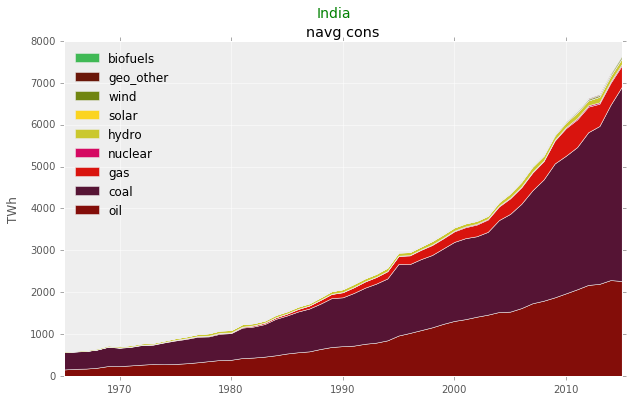

In [58]:
stackplotter('India','navg','cons','all')

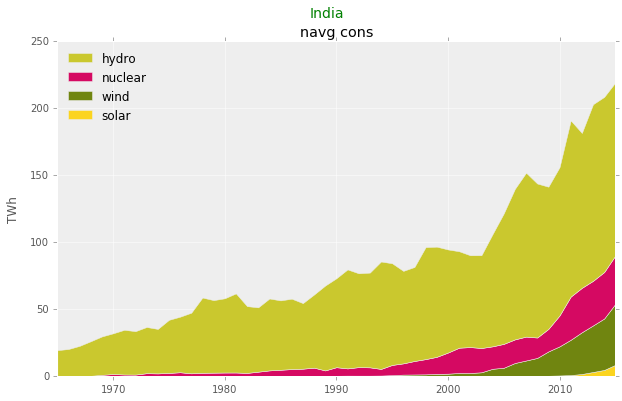

In [59]:
stackplotter('India','navg','cons',['solar','wind','nuclear','hydro'])

## Initialize scenario data variables

In [60]:
DATA1={}
DATA2={}
DATA3={}
DATA4={}
DATA5={}
DATA6={}
for y in range(1980,2016):
    DATA1[y]={}
    DATA2[y]={}
    DATA3[y]={}
    DATA4[y]={}
    DATA5[y]={}
    DATA6[y]={}
    for fuel in {"oil","coal","solar","wind","gas","nuclear","hydro"}:
        DATA1[y][fuel]=data['India'][y]['energy'][fuel]['cons']['navg']
        DATA2[y][fuel]=data['India'][y]['energy'][fuel]['cons']['navg']
        DATA3[y][fuel]=data['India'][y]['energy'][fuel]['cons']['navg']
        DATA4[y][fuel]=data['India'][y]['energy'][fuel]['cons']['navg']
        DATA5[y][fuel]=data['India'][y]['energy'][fuel]['cons']['navg']
        DATA6[y][fuel]=data['India'][y]['energy'][fuel]['cons']['navg']

# Bring in projections

### IEA
https://www.iea.org/publications/freepublications/publication/india-energy-outlook-2015.html  
Table 2.1 (generation for fossils, nuclear and hydro)  
Table 2.4 (capacity, for wind and solar, converted to generation through observed capacity factors)

In [61]:
df=pd.read_excel("e3.xlsx",sheetname="IEA").head(5)
df=df[['Oil','Gas','Coal','Nuclear','Hydro','Wind','PV']]
df.columns=['oil','gas','coal','nuclear','hydro','wind','solar']
df=df.T
shr=0.5
df[2025]=df[2020]*shr+df[2030]*(1-shr)
df[2035]=df[2030]*shr+df[2040]*(1-shr)
df=df.T.sort_index()
#df=df.head(5) #no need for 2035,3040
df

,oil,gas,coal,nuclear,hydro,wind,solar
2000.0,112,23,146,4,6,0,0
2013.0,176,45,341,9,12,2.12226,0.262976
2020.0,229,58,476,17,15,6.244,3.32181
2025.0,279,80.5,583,30,18.5,10.498,8.53074
2030.0,329,103,690,43,22,14.7521,13.7397
2035.0,393.5,126,812,56.5,25.5,18.3019,20.1732
2040.0,458,149,934,70,29,21.8518,26.6068


In [62]:
for y in df.index:
    if int(y)>2015:
        for fuel in df.columns:
            if y not in DATA1: DATA1[int(y)]={}
            DATA1[int(y)][fuel]=df.loc[y][fuel]*mtoe_to_TWh 

### EIA
http://www.eia.gov/forecasts/ieo/ieo_tables.cfm  
Tables F14, H16-H22

In [72]:
df=pd.read_excel("e3.xlsx",sheetname="EIA2").head(7)
df=df[['Oil','Gas','Coal','Nuclear','Wind','Hydro','Solar']]
df.columns=['oil','gas','coal','nuclear','wind','hydro','solar']
#df=df.head(8) #no need for 2035,3040
df

,oil,gas,coal,nuclear,wind,hydro,solar
2011,7,2.4,11.9,29,26,142,1
2012,7.3,2.2,13,30,28,125,2
2020,9.7,2.5,15.3,67,59,196,17
2025,11.1,3.1,16.7,117,100,255,53
2030,12.7,4,18.3,206,130,287,85
2035,15,5.2,21.1,222,155,341,101
2040,17.8,6.4,24.8,248,183,405,120


In [73]:
fdict={"oil":kbpd_to_TWh*1000,"coal":qbtu_to_TWh,"gas":tcf_to_TWh,"nuclear":1,"solar":qbtu_to_TWh,
       "hydro":qbtu_to_TWh,"wind":qbtu_to_TWh}
fdict={"oil":qbtu_to_TWh,"coal":qbtu_to_TWh,"gas":qbtu_to_TWh,"nuclear":1,"solar":1,
       "hydro":1,"wind":1}
for y in df.index:
    if int(y)>2015:
        for fuel in df.columns:
            if y not in DATA2: DATA2[int(y)]={}
            DATA2[int(y)][fuel]=df.loc[y][fuel]*fdict[fuel]

### INDC
http://www4.unfccc.int/Submissions/INDC/Published%20Documents/India/1/INDIA%20INDC%20TO%20UNFCCC.pdf

In [74]:
#INDC does not have demand assumption
#let us assume per capita evolution for demand, nuclear, hydro and gas avg of EIA and IEA
#INDC for solar and wind, offsetting coal

In [75]:
df=pd.read_excel("e3.xlsx",sheetname="INDC")
df=df[['wind','solar']]
df['wind']*=(cfw13+cfw14)/2*8.760
df['solar']*=(cfs13+cfs14)/2*8.760
df['wind']+=DATA3[2015]['wind']
df['solar']+=DATA3[2015]['solar']
#df.columns=['oil','gas','coal','nuclear','hydro','wind','solar']
df

,wind,solar
2016,60.129367,33.260588
2017,74.702651,58.357868
2018,89.275934,87.638028
2019,103.849217,116.918188
2021,118.422501,146.198347
2022,132.995784,175.478507
2023,147.569068,204.758667
2024,162.142351,234.038827
2025,176.715634,263.318986
2026,191.288918,292.599146


In [76]:
for y in df.index:
    if y>2015:
        if int(y) in DATA1:
            if y not in DATA3:DATA3[y]={}
            for fuel in {"oil","gas","hydro","nuclear"}:
                DATA3[y][fuel]=(DATA1[y][fuel]+DATA2[y][fuel])/2.0
            for fuel in {"wind","solar"}:
                DATA3[y][fuel]=df.loc[y][fuel]
            DATA3[y]["coal"]=(DATA1[y]["coal"]+DATA2[y]["coal"])/2.0+\
                             (DATA1[y]["wind"]+DATA2[y]["wind"])/2.0+\
                             (DATA1[y]["solar"]+DATA2[y]["solar"])/2.0-\
                             DATA3[y]["solar"]-DATA3[y]["wind"]

### HALF

Interpolator helper function

In [77]:
def interpolate(d,years,gfit=2,depth=1,polyorder=1,override=False,ends=False):
#d=helper
#years=[2015]
#gfit=1
#depth=extrapolatedict[fuel]
#polyorder=1
#override=True
#ends=True
#if True:
    #depth * length of interpolation substrings will be taken to the left and right
    #for example for {1971:5,1972:6,1973:7,1974:5} interpolating it over 1969-1990
    #for the section 1960-1970 (2 elements) the values from 1972,1973,1974 (3 elements) will be taken with depth 1.5
    #for the section 1974-1990 (15 elements) all values  (4 elements) will be taken to extrapolate
    #override to extend interpolation to edges, i.e. extrapolate
    if (gfit>2): 
        print 'interpolate takes only 1 (polynomial) or 2 (exponential) as 3rd argument [default=2]'
        return
    mydict={}
    if d!={}:
        missing_points=[[]]
        onbeginning=False
        onend=False
        for year in years:
            if year not in d.keys():
                missing_points[-1].append(year)
            else:
                missing_points.append([])
        for m in missing_points:
            if m:
                fit=gfit

                #if only one point, set min extrapolation depth to 2
                if (len(m)==1): depth=max(depth,2)
                
                #check if it is ends of the interval, 
                if ((m[-1]<np.sort(d.keys())[0])|(m[0]>np.sort(d.keys())[-1])): 
                    #if not set to override then extrapolate mean only
                    if not override: 
                        fit=0                    

                if fit==0: #take average
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),min(m)-int(3))),\
                                                                           int(min(max(years),max(m)+int(3))+1)))}
                    #returned empty, on beginning
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                    for i in range(len(m)):
                        mydict[m[i]]=np.mean(y.values())
                elif fit==1:
                    #intersector
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),\
                                min(m)-int(depth*len(m)))),int(min(max(years),max(m)+int(depth*len(m)))+1)))}
                    #returned empty
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                            
                    w = np.polyfit(y.keys(),y.values(),polyorder) # obtaining regression parameters
                    if (polyorder==1):
                        intersector=w[0]*np.array(m)+w[1]
                    else:
                        intersector=w[0]*np.array(m)*np.array(m)+w[1]*np.array(m)+w[2]
                    for i in range(len(m)):
                        mydict[m[i]]=max(0,intersector[i])
                else:
                    #exponential intersector
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),\
                                min(m)-int(depth*len(m)))),int(min(max(years),max(m)+int(depth*len(m)))+1)))}
                    #returned empty
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                    
                    w = np.polyfit(y.keys(),np.log(y.values()),1) # obtaining log regression parameters (exp fitting)
                    intersector=np.exp(w[1])*np.exp(w[0]*np.array(m))
                    for i in range(len(m)):
                        mydict[m[i]]=max(0,intersector[i])
                    
                #record ends adjustment beginning and end
                if ends:
                    if (m[-1]<np.sort(d.keys())[0]):
                        onbeginning=True
                        beginning=m[-1]
                    if (m[0]>np.sort(d.keys())[-1]): 
                        onend=True
                        end=m[0]
        #finish ends adjustment
        if ends:
            if onbeginning:
                #calculate adjustment scaler
                if (mydict[beginning]==0): scaler=0
                elif (beginning+1 in d): scaler=d[beginning+1]*1.0/mydict[beginning]
                else: scaler=d[np.sort(d.keys())[0]]*1.0/mydict[beginning]
                #readjust data
                for year in mydict:
                    if (year<=beginning):
                        mydict[year]*=scaler
            if onend:
                #calculate adjustment scaler
                if (mydict[end]==0): scaler=0
                elif (end-1 in d): scaler=d[end-1]*1.0/mydict[end]
                else: scaler=d[np.sort(d.keys())[-1]]*1.0/mydict[end]
                #readjust data
                for year in mydict:
                    if (year>=end):
                        mydict[year]*=scaler

    #return interpolated points
    return mydict

Hubbert function

In [131]:
reserves={'coal':22406*EJ_to_TWh,'gas':27810*EJ_to_TWh,'oil':25460*EJ_to_TWh}
#http://www.sciencedirect.com/science/article/pii/S0016236114010254 - Table 1 and Table 3 columns BG
#convert to emissions reserves
#also, we take the 990GtCO2 66% case in contrast to the 1100GtCO2 50%.
ei={"oil":0.242,"gas":0.198,"coal":0.33}#emissions intenisty GtCO2/TWh
#http://www.nature.com/nature/journal/v517/n7533/fig_tab/nature14016_T1.html
#adjuster: first adjust from 2050 budget to 2100 budget, second, split budget among fuels based on intensity
adj={"oil":474/337.0/(ei["oil"]/np.mean(ei.values())),
     "gas":294/201.1/(ei["gas"]/np.mean(ei.values())),
     "coal":624/430.0/(ei["coal"]/np.mean(ei.values()))}
units={"oil":Gboe_to_TWh,"gas":tcm_to_TWh,"coal":mtcoe_to_TWh*1000}
unburn={"oil":449,"gas":100,"coal":887}#remaining reserves
unburnfrac={"oil":0.35,"gas":0.52,"coal":0.88}#fraction unburnable
def hubbert(fuel,country='India',full=False,ur=2,tpeak=2015,db='navg',flow='cons'):
    m=subgetter(country,fuel,db,flow)
    n={}
    for i in range(len(m['x'])):
        n[m['x'][i]]=max(0,m['y'][i])

    #super long-term
    o=interpolate(n,range(2012,tpeak),2,3,1,True,True)
    p=interpolate(o,range(tpeak-3,tpeak+1),1,1,1,False,True)
    o.update(p)

    x=np.arange(tpeak,2051,5)
    #define Hubbert curve
    def hubbert1(x,peak,tpeak,urr):
        return 2*peak/(1+np.cosh((x-tpeak)*4*peak/urr))
    def hubbert2(x,peak,tpeak,urr):
        return 2*peak/(1+np.cosh((x-tpeak)*8*peak/urr))

    if tpeak in o: peak=o[tpeak]
    else: peak=n[tpeak]
    if (ur==1): urr=subgetter(country,fuel,db,'res')['y'][-1]
    else: urr=unburn[fuel]*units[fuel]*(1-unburnfrac[fuel])/unburnfrac[fuel]*adj[fuel]/2.0 #!half
    if full: y=hubbert1(x,peak,tpeak,urr)
    else: y=hubbert2(x,peak,tpeak,urr)

    ret={x[i]:y[i] for i in range(len(x))}
    ret.update(o)
        
    return ret

In [132]:
effscaler={2040:0.34,2035:0.24,2030:0.16,2025:0.1,2020:0.05,}
for y in DATA3:
    if y>2015:
        if y not in DATA4:DATA4[y]={}
        for fuel in {"hydro","nuclear"}:
            DATA4[y][fuel]=DATA3[y][fuel]*1.0
        for fuel in {"coal","oil","gas"}:
            DATA4[y][fuel]=hubbert(fuel)[y]
        gap=DATA3[y]["coal"]+DATA3[y]["gas"]+DATA3[y]["oil"]-DATA4[y]["coal"]-DATA4[y]["gas"]-DATA4[y]["oil"]
        for fuel in {"solar","wind"}:
            DATA4[y][fuel]=DATA3[y][fuel]+gap*0.5*(1-effscaler[y])

## Plotting

In [133]:
fpath = 'Comfortaa.ttf'
import matplotlib as mpl
import matplotlib.font_manager as font_manager
prop = font_manager.FontProperties(fname=fpath)

In [134]:
#for plot styling - not necessary
plt.style.use('fivethirtyeight')
#plt.style.use('classic')
fuels=[u'coal',u'oil',u'gas','nuclear','hydro',u'wind',u'solar']

fuelcolors=[np.array([85,20,52])/256.0,
            np.array([131,13,98])/256.0,
            np.array([213,9,98])/256.0,
            np.array([0,64,16])/256.0,
            np.array([112,133,16])/256.0,
            np.array([251,212,31])/256.0,
            np.array([254,159,28])/256.0]
fuelcolors=[]
for f in fuels:
    fuelcolors.append(gcolors[f])

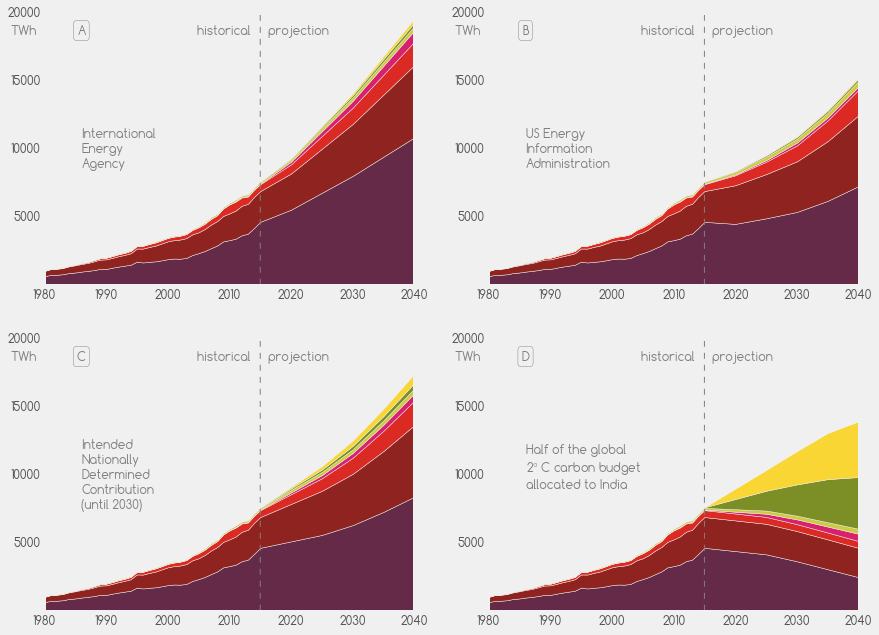

In [135]:
fig,ax = plt.subplots(2,2,figsize=(13,10))  
#1
y=[0 for i in range(len(DATA1))]
for fuel in fuels[::-1]:
    s=[[],[]]
    for i in DATA1:
        s[0].append(i)
        s[1].append(DATA1[i][fuel])
    y=np.vstack((s[1],y))

sp=ax[0][0].stackplot(s[0],y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[0][0].grid('off')
ax[0][0].text(0.59, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][0].transAxes,size=12,color='grey')
ax[0][0].text(0.1, 0.5, u"International\nEnergy\nAgency",
        horizontalalignment='left',
        verticalalignment='center',fontproperties=prop,
        transform=ax[0][0].transAxes,size=12,color='grey')
ax[0][0].plot([2015,2015.001],[0,20000],color='grey',ls='--',lw=1)
yl=20000
ax[0][0].set_ylim(0,yl)
ax[0][0].set_xlim(1980,2040)
ax[0][0].set_yticklabels(["",5000,10000,15000,20000],fontproperties=prop,size=12)
ax[0][0].set_xticklabels([1980,1990,2000,2010,2020,2030,2040],fontproperties=prop,size=12)
#2
y=[0 for i in range(len(DATA2))]
for fuel in fuels[::-1]:
    s=[[],[]]
    for i in DATA2:
        s[0].append(i)
        s[1].append(DATA2[i][fuel])
    y=np.vstack((s[1],y))

sp=ax[0][1].stackplot(s[0],y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[0][1].grid('off')
ax[0][1].text(0.59, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][1].transAxes,size=12,color='grey')
ax[0][1].text(0.1, 0.5, u"US Energy\nInformation\nAdministration",
        horizontalalignment='left',
        verticalalignment='center',fontproperties=prop,
        transform=ax[0][1].transAxes,size=12,color='grey')
ax[0][1].plot([2015,2015.001],[0,20000],color='grey',ls='--',lw=1)
yl=20000
ax[0][1].set_ylim(0,yl)
ax[0][1].set_xlim(1980,2040)
ax[0][1].set_yticklabels(["",5000,10000,15000,20000],fontproperties=prop,size=12)
ax[0][1].set_xticklabels([1980,1990,2000,2010,2020,2030,2040],fontproperties=prop,size=12)
#3
y=[0 for i in range(len(DATA3))]
for fuel in fuels[::-1]:
    s=[[],[]]
    for i in DATA3:
        s[0].append(i)
        s[1].append(DATA3[i][fuel])
    y=np.vstack((s[1],y))

sp=ax[1][0].stackplot(s[0],y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[1][0].grid('off')
ax[1][0].text(0.59, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][0].transAxes,size=12,color='grey')
ax[1][0].text(0.1, 0.5, u"Intended\nNationally\nDetermined\nContribution\n(until 2030)",
        horizontalalignment='left',
        verticalalignment='center',fontproperties=prop,
        transform=ax[1][0].transAxes,size=12,color='grey')
ax[1][0].plot([2015,2015.001],[0,20000],color='grey',ls='--',lw=1)
yl=20000
ax[1][0].set_ylim(0,yl)
ax[1][0].set_xlim(1980,2040)
ax[1][0].set_yticklabels(["",5000,10000,15000,20000],fontproperties=prop,size=12)
ax[1][0].set_xticklabels([1980,1990,2000,2010,2020,2030,2040],fontproperties=prop,size=12)
#4
y=[0 for i in range(len(DATA4))]
for fuel in fuels[::-1]:
    s=[[],[]]
    for i in DATA4:
        s[0].append(i)
        s[1].append(DATA4[i][fuel])
    y=np.vstack((s[1],y))

sp=ax[1][1].stackplot(s[0],y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[1][1].grid('off')
ax[1][1].text(0.59, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][1].transAxes,size=12,color='grey')
ax[1][1].text(0.1, 0.5, u"Half of the global\n2$\degree$ C carbon budget\nallocated to India\n",
        horizontalalignment='left',
        verticalalignment='center',fontproperties=prop,
        transform=ax[1][1].transAxes,size=12,color='grey')
ax[1][1].plot([2015,2015.001],[0,20000],color='grey',ls='--',lw=1)
yl=20000
ax[1][1].set_ylim(0,yl)
ax[1][1].set_xlim(1980,2040)
ax[1][1].set_yticklabels(["",5000,10000,15000,20000],fontproperties=prop,size=12)
ax[1][1].set_xticklabels([1980,1990,2000,2010,2020,2030,2040],fontproperties=prop,size=12)
#formatting
ax[1][1].text(0.1, 0.96, r"D",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][1].transAxes,size=12,color='grey',
                  bbox=dict(boxstyle="round", fc="none", edgecolor='grey',alpha=0.9))
ax[0][1].text(0.1, 0.96, r"B",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][1].transAxes,size=12,color='grey',
                  bbox=dict(boxstyle="round", fc="none", edgecolor='grey',alpha=0.9))
ax[1][0].text(0.1, 0.96, r"C",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][0].transAxes,size=12,color='grey',
                  bbox=dict(boxstyle="round", fc="none", edgecolor='grey',alpha=0.9))
ax[0][0].text(0.1, 0.96, r"A",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][0].transAxes,size=12,color='grey',
                  bbox=dict(boxstyle="round", fc="none", edgecolor='grey',alpha=0.9))
ax[0][0].text(-0.055, 0.96, r"TWh",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][0].transAxes,size=12,color='grey')
ax[0][1].text(-0.055, 0.96, r"TWh",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][1].transAxes,size=12,color='grey')
ax[1][1].text(-0.055, 0.96, r"TWh",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][1].transAxes,size=12,color='grey')
ax[1][0].text(-0.055, 0.96, r"TWh",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][0].transAxes,size=12,color='grey')
plt.savefig('india_new.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

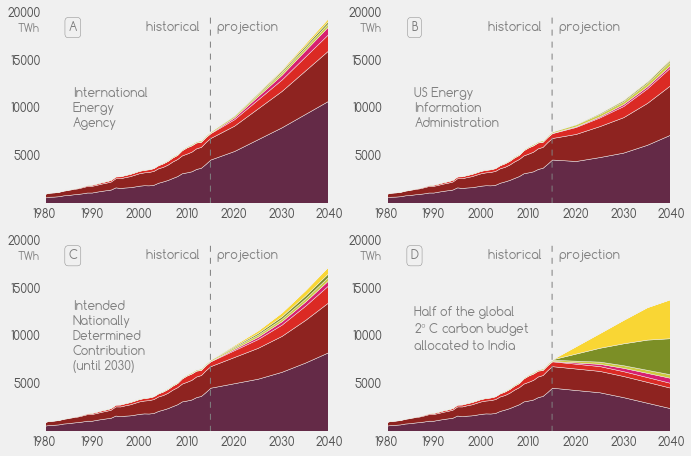

In [136]:
fig,ax = plt.subplots(2,2,figsize=(10,7))  
#1
y=[0 for i in range(len(DATA1))]
for fuel in fuels[::-1]:
    s=[[],[]]
    for i in DATA1:
        s[0].append(i)
        s[1].append(DATA1[i][fuel])
    y=np.vstack((s[1],y))

sp=ax[0][0].stackplot(s[0],y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[0][0].grid('off')
ax[0][0].text(0.59, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][0].transAxes,size=12,color='grey')
ax[0][0].text(0.1, 0.5, u"International\nEnergy\nAgency",
        horizontalalignment='left',
        verticalalignment='center',fontproperties=prop,
        transform=ax[0][0].transAxes,size=12,color='grey')
ax[0][0].plot([2015,2015.001],[0,20000],color='grey',ls='--',lw=1)
yl=20000
ax[0][0].set_ylim(0,yl)
ax[0][0].set_xlim(1980,2040)
ax[0][0].set_yticklabels(["",5000,10000,15000,20000],fontproperties=prop,size=12)
ax[0][0].set_xticklabels([1980,1990,2000,2010,2020,2030,2040],fontproperties=prop,size=12)
#2
y=[0 for i in range(len(DATA2))]
for fuel in fuels[::-1]:
    s=[[],[]]
    for i in DATA2:
        s[0].append(i)
        s[1].append(DATA2[i][fuel])
    y=np.vstack((s[1],y))

sp=ax[0][1].stackplot(s[0],y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[0][1].grid('off')
ax[0][1].text(0.59, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][1].transAxes,size=12,color='grey')
ax[0][1].text(0.1, 0.5, u"US Energy\nInformation\nAdministration",
        horizontalalignment='left',
        verticalalignment='center',fontproperties=prop,
        transform=ax[0][1].transAxes,size=12,color='grey')
ax[0][1].plot([2015,2015.001],[0,20000],color='grey',ls='--',lw=1)
yl=20000
ax[0][1].set_ylim(0,yl)
ax[0][1].set_xlim(1980,2040)
ax[0][1].set_yticklabels(["",5000,10000,15000,20000],fontproperties=prop,size=12)
ax[0][1].set_xticklabels([1980,1990,2000,2010,2020,2030,2040],fontproperties=prop,size=12)
#3
y=[0 for i in range(len(DATA3))]
for fuel in fuels[::-1]:
    s=[[],[]]
    for i in DATA3:
        s[0].append(i)
        s[1].append(DATA3[i][fuel])
    y=np.vstack((s[1],y))

sp=ax[1][0].stackplot(s[0],y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[1][0].grid('off')
ax[1][0].text(0.59, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][0].transAxes,size=12,color='grey')
ax[1][0].text(0.1, 0.5, u"Intended\nNationally\nDetermined\nContribution\n(until 2030)",
        horizontalalignment='left',
        verticalalignment='center',fontproperties=prop,
        transform=ax[1][0].transAxes,size=12,color='grey')
ax[1][0].plot([2015,2015.001],[0,20000],color='grey',ls='--',lw=1)
yl=20000
ax[1][0].set_ylim(0,yl)
ax[1][0].set_xlim(1980,2040)
ax[1][0].set_yticklabels(["",5000,10000,15000,20000],fontproperties=prop,size=12)
ax[1][0].set_xticklabels([1980,1990,2000,2010,2020,2030,2040],fontproperties=prop,size=12)
#4
y=[0 for i in range(len(DATA4))]
for fuel in fuels[::-1]:
    s=[[],[]]
    for i in DATA4:
        s[0].append(i)
        s[1].append(DATA4[i][fuel])
    y=np.vstack((s[1],y))

sp=ax[1][1].stackplot(s[0],y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[1][1].grid('off')
ax[1][1].text(0.59, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][1].transAxes,size=12,color='grey')
ax[1][1].text(0.1, 0.5, u"Half of the global\n2$\degree$ C carbon budget\nallocated to India\n",
        horizontalalignment='left',
        verticalalignment='center',fontproperties=prop,
        transform=ax[1][1].transAxes,size=12,color='grey')
ax[1][1].plot([2015,2015.001],[0,20000],color='grey',ls='--',lw=1)
yl=20000
ax[1][1].set_ylim(0,yl)
ax[1][1].set_xlim(1980,2040)
ax[1][1].set_yticklabels(["",5000,10000,15000,20000],fontproperties=prop,size=12)
ax[1][1].set_xticklabels([1980,1990,2000,2010,2020,2030,2040],fontproperties=prop,size=12)
#formatting
ax[1][1].text(0.1, 0.96, r"D",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][1].transAxes,size=12,color='grey',
                  bbox=dict(boxstyle="round", fc="none", edgecolor='grey',alpha=0.9))
ax[0][1].text(0.1, 0.96, r"B",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][1].transAxes,size=12,color='grey',
                  bbox=dict(boxstyle="round", fc="none", edgecolor='grey',alpha=0.9))
ax[1][0].text(0.1, 0.96, r"C",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][0].transAxes,size=12,color='grey',
                  bbox=dict(boxstyle="round", fc="none", edgecolor='grey',alpha=0.9))
ax[0][0].text(0.1, 0.96, r"A",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][0].transAxes,size=12,color='grey',
                  bbox=dict(boxstyle="round", fc="none", edgecolor='grey',alpha=0.9))
ax[0][0].text(-0.055, 0.95, r"TWh",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][0].transAxes,size=10,color='grey')
ax[0][1].text(-0.055, 0.95, r"TWh",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0][1].transAxes,size=10,color='grey')
ax[1][1].text(-0.055, 0.95, r"TWh",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][1].transAxes,size=10,color='grey')
ax[1][0].text(-0.055, 0.95, r"TWh",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[1][0].transAxes,size=10,color='grey')
plt.savefig('india2_new.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

### Capacity back-conversion

In [137]:
#wind generation capacity in GW
print 2025, DATA4[2025]['wind']/8.760/((cfw13+cfw14)/2)
print 2030, DATA4[2030]['wind']/8.760/((cfw13+cfw14)/2)
print 2040, DATA4[2040]['wind']/8.760/((cfw13+cfw14)/2)

2025 800.093276614
2030 1265.09843777
2040 2090.96590873


In [138]:
#solar generation capacity in GW
print 2025, DATA4[2025]['solar']/8.760/((cfs13+cfs14)/2)
print 2030, DATA4[2030]['solar']/8.760/((cfs13+cfs14)/2)
print 2040, DATA4[2040]['solar']/8.760/((cfs13+cfs14)/2)

2025 922.869902451
2030 1473.09838672
2040 2460.1688175


<p><br><p>We would like to express our gratitude to all of the developers of the libraries used and especially to the affiliates of <i>EIA, BP and World Bank</i> for their great database and openly accesible data. The data manipulation algorithms are open sourced and freely reproducible under an <a href="http://opensource.org/licenses/MIT" target="_blank">MIT license</a>.</p>
<br>
<p><a href="http://www.csaladen.es" target="_blank">Dénes Csala</a>&nbsp;&nbsp;|&nbsp;&nbsp;2016</p>